In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load and explore flights dataset
flights = pd.read_csv('flights2022.csv')
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111376 entries, 0 to 111375
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111376 non-null  int64  
 1   month           111376 non-null  int64  
 2   day             111376 non-null  int64  
 3   dep_time        108931 non-null  float64
 4   sched_dep_time  111376 non-null  int64  
 5   dep_delay       108931 non-null  float64
 6   arr_time        108834 non-null  float64
 7   sched_arr_time  111376 non-null  int64  
 8   arr_delay       108697 non-null  float64
 9   carrier         111376 non-null  object 
 10  flight          111376 non-null  int64  
 11  tailnum         111247 non-null  object 
 12  origin          111376 non-null  object 
 13  dest            111376 non-null  object 
 14  air_time        108697 non-null  float64
 15  distance        111376 non-null  int64  
 16  hour            111376 non-null  int64  
 17  minute    

In [3]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


In [4]:
# Create a column with routes by combining strings in origin and destination columns
flights['route'] = flights['origin'] + '-' + flights['dest']

In [5]:
# Calculate average departure delays and number of canceled flights for each route
routes_delays_cancels = flights.groupby('route').agg(
    avg_dep_delay=('dep_delay', 'mean'), 
    canceled_flights=('dep_time', lambda x: x.isna().sum())
).reset_index()

In [6]:
# Calculate average departure delays and number of canceled flights for each airline
airlines_delays_cancels = flights.groupby(['airline']).agg(
    avg_dep_delay=('dep_delay', 'mean'), 
    canceled_flights=('dep_time', lambda x: x.isna().sum())
).reset_index()

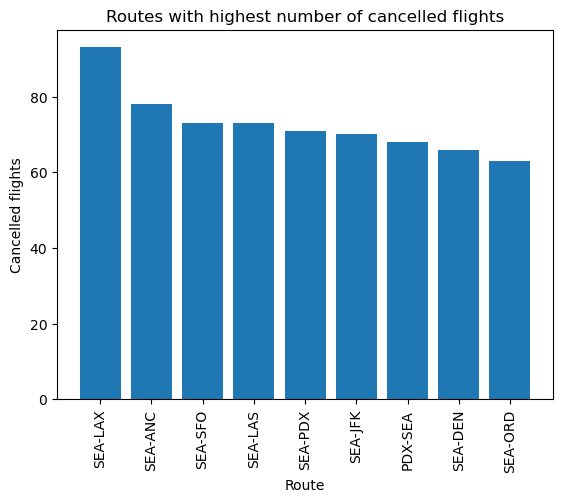

In [7]:
# Visualise the routes with highest number of cancellations 
top_routes_delays_cancels = routes_delays_cancels.sort_values(by='canceled_flights', ascending=False).head(9)

top9_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_delays_cancels['route'],top_routes_delays_cancels['canceled_flights'])
plt.xticks(rotation='vertical')
ax.set_xlabel('Route')
ax.set_ylabel('Cancelled flights')
ax.set_title('Routes with highest number of cancelled flights')
plt.show()

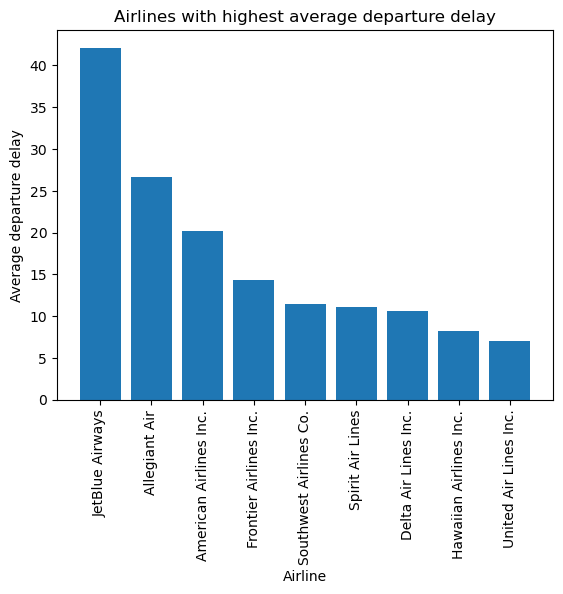

In [8]:
# Visualise the airlines with highest average departure delays
top_airlines_delays_cancels = airlines_delays_cancels.sort_values(by='avg_dep_delay', ascending=False).head(9)

top9_airline_delays_bar, ax = plt.subplots()
ax.bar(top_airlines_delays_cancels['airline'], top_airlines_delays_cancels['avg_dep_delay'])
plt.xticks(rotation='vertical')
ax.set_xlabel('Airline')
ax.set_ylabel('Average departure delay')
ax.set_title('Airlines with highest average departure delay')
plt.show()

In [9]:
# Load and explore the weather dataset
weather = pd.read_csv('flights_weather2022.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111006 non-null  int64  
 1   month           111006 non-null  int64  
 2   day             111006 non-null  int64  
 3   dep_time        108566 non-null  float64
 4   sched_dep_time  111006 non-null  int64  
 5   dep_delay       108566 non-null  float64
 6   arr_time        108469 non-null  float64
 7   sched_arr_time  111006 non-null  int64  
 8   arr_delay       108332 non-null  float64
 9   carrier         111006 non-null  object 
 10  flight          111006 non-null  int64  
 11  tailnum         110877 non-null  object 
 12  origin          111006 non-null  object 
 13  dest            111006 non-null  object 
 14  air_time        108332 non-null  float64
 15  distance        111006 non-null  int64  
 16  hour            111006 non-null  int64  
 17  minute    

In [10]:
weather.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [11]:
# Create groups based on wind gust (equal or above 10mph and below 10mph)
weather['wind_gust_group'] = weather['wind_gust'].apply(lambda x: '>=10mph' if x >=10 else '<10mph')

In [12]:
# Calculate the average departure delay by wind gust group and origin
dep_delay_origin_wind = weather.groupby(['wind_gust_group', 'origin']).agg(avg_dep_delay=('dep_delay', 'mean'))
print(dep_delay_origin_wind)

                        avg_dep_delay
wind_gust_group origin               
<10mph          PDX          6.686966
                SEA          7.857595
>=10mph         PDX          9.147024
                SEA          9.231060
